In [39]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("italy-covid-daywise.csv")

In [5]:
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


**retrieve the number of rows
and columns in the data frame**

In [6]:
num_rows=df.shape[0]
num_cols=df.shape[1]
print(f"number of rows={num_rows},number of columns={num_cols}")

number of rows=248,number of columns=4


**view statistical
information for numerical columns**

In [8]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


**view some basic information
about the data frame like data types, and number of non-nulls**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


**create a list of columns
within the data frame**


In [11]:
columns_list=df.columns.tolist()
print('list of features ',columns_list)

list of features  ['date', 'new_cases', 'new_deaths', 'new_tests']


**return only the days which
had more than 1000 reported cases**

In [12]:
high_cases=df.loc[df['new_cases']>1000,'date']
print('the days which had more than 1000 reported cases\n',high_cases)

the days which had more than 1000 reported cases
 68     2020-03-08
69     2020-03-09
70     2020-03-10
72     2020-03-12
73     2020-03-13
          ...    
241    2020-08-28
242    2020-08-29
243    2020-08-30
244    2020-08-31
247    2020-09-03
Name: date, Length: 72, dtype: object


**create positive_rate column
that is equal to new_cases / new_tests**

In [13]:
df['positive_rate']=df['new_cases'] / df['new_tests']

In [15]:
df.tail()

,date,new_cases,new_deaths,new_tests,positive_rate
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN
247,2020-09-03,1326.0,6.0,NaN,NaN


**let's remove the positive_rate column**

In [16]:
df=df.drop(columns=['positive_rate'])

In [17]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


**sort to identify the days
with the highest number of cases**

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [19]:
df['new_cases']=df['new_cases'].replace(-148.0, 148.0)

In [22]:
sorted=df.sort_values(by='new_cases', ascending=False)
sorted

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


**check the data type of date column,then convert it into a datetime**


In [23]:
print(df['date'].dtype)

object


In [24]:
df['date']=pd.to_datetime(df['date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


**extract different parts
(day, month, weekday, and year) of the date column into separate columns**

In [27]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday']=df['date'].dt.weekday
df['year'] = df['date'].dt.year
df

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
0,2019-12-31,0.0,0.0,NaN,31,12,1,2019
1,2020-01-01,0.0,0.0,NaN,1,1,2,2020
2,2020-01-02,0.0,0.0,NaN,2,1,3,2020
3,2020-01-03,0.0,0.0,NaN,3,1,4,2020
4,2020-01-04,0.0,0.0,NaN,4,1,5,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,6,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,0,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,1,2020
246,2020-09-02,975.0,8.0,NaN,2,9,2,2020


In [28]:
df.tail(10)

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
238,2020-08-25,953.0,4.0,45798.0,25,8,1,2020
239,2020-08-26,876.0,4.0,58054.0,26,8,2,2020
240,2020-08-27,1366.0,13.0,57640.0,27,8,3,2020
241,2020-08-28,1409.0,5.0,65135.0,28,8,4,2020
242,2020-08-29,1460.0,9.0,64294.0,29,8,5,2020
243,2020-08-30,1444.0,1.0,53541.0,30,8,6,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,0,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,1,2020
246,2020-09-02,975.0,8.0,NaN,2,9,2,2020
247,2020-09-03,1326.0,6.0,NaN,3,9,3,2020


**check the overall metricsfor May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')**


In [30]:
may=df[(df['date'].dt.month == 5)]
may_new_cases = may['new_cases'].sum()
may_new_deaths = may['new_deaths'].sum()
may_new_tests = may['new_tests'].sum()

In [31]:
print(may_new_cases)
print(may_new_deaths)
print(may_new_tests)

29073.0
5658.0
1078720.0


**which day seems like have more cases?**

In [32]:
maxDay=df.loc[df['new_cases'].idxmax()]
maxDay

date          2020-03-22 00:00:00
new_cases                  6557.0
new_deaths                  795.0
new_tests                     NaN
day                            22
month                           3
weekday                         6
year                         2020
Name: 82, dtype: object

In [33]:
# most_day_cases=df.loc[df['new_cases'].idxmax(),'date']
# print("the heighest day had new cases= ",most_day_cases)

the heighest day had new cases=  2020-03-22 00:00:00


**create a new dataframe withmonth-wise data**


In [34]:
# month_wise_data = df.groupby(df['month']).agg({
#     'new_cases': 'sum',
#     'new_deaths': 'sum',
#     'new_tests': 'sum'
# }).reset_index()


# print('Month-wise data:\n', month_wise_data)

Month-wise data:
    month  new_cases  new_deaths  new_tests
0      1        3.0         0.0        0.0
1      2      885.0        21.0        0.0
2      3   100851.0     11570.0        0.0
3      4   101852.0     16091.0   419591.0
4      5    29073.0      5658.0  1078720.0
5      6     8068.0      1404.0   830354.0
6      7     6722.0       388.0   797692.0
7      8    21060.0       345.0  1098704.0
8      9     3297.0        20.0    54395.0
9     12        0.0         0.0        0.0


In [35]:
month = df.groupby(df['date'].dt.to_period("M")).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'new_tests': 'sum'
}).reset_index()
month

,date,new_cases,new_deaths,new_tests
0,2019-12,0.0,0.0,0.0
1,2020-01,3.0,0.0,0.0
2,2020-02,885.0,21.0,0.0
3,2020-03,100851.0,11570.0,0.0
4,2020-04,101852.0,16091.0,419591.0
5,2020-05,29073.0,5658.0,1078720.0
6,2020-06,8068.0,1404.0,830354.0
7,2020-07,6722.0,388.0,797692.0
8,2020-08,21060.0,345.0,1098704.0
9,2020-09,3297.0,20.0,54395.0


**plot a line graph showinghow the number of daily cases varies over time.**

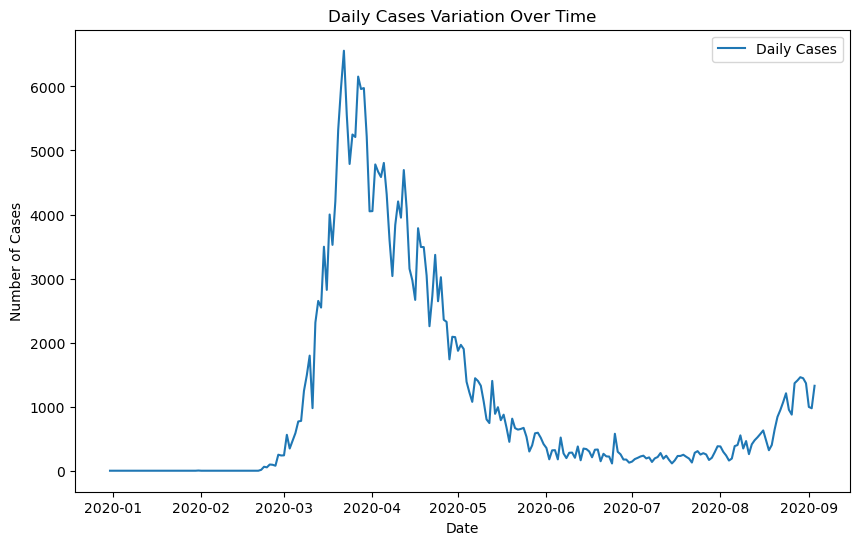

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['new_cases'], label='Daily Cases')
plt.title('Daily Cases Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend();